# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
import requests

# API key for OpenWeatherMap 
api_key = '4a1871ac4a3c6d3698bd2780bb69fce1'

# Base URL for OpenWeatherMap API

base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + '4a1871ac4a3c6d3698bd2780bb69fce1'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
 
    city_url = base_url + "&q=" + city
   
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        data = requests.get(city_url).json()
      
        # Parse the JSON and retrieve data
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error processing city {city}: {e}")
        print("Skipping...")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | poronaysk
Processing Record 5 of Set 1 | 'ohonua
Error processing city 'ohonua: 'coord'
Skipping...
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | jeremoabo
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | kaga bandoro
Processing Record 12 of Set 1 | zhalantun
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | quesnel
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | nova sintra
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | borogontsy
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | tongouson
Processing Record 22 of 

In [6]:
import pandas as pd

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()



City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.11,66,70,11.37,TF,1700026892
1,bethel,41.3712,-73.4140,3.85,79,0,2.06,US,1700026903
2,badger,64.8000,-147.5333,-5.07,80,75,1.54,US,1700026945
3,poronaysk,49.2167,143.1167,-3.55,74,32,0.95,RU,1700026921
4,grytviken,-54.2811,-36.5092,2.59,92,95,1.58,GS,1700026898


In [8]:
import pandas as pd

# Export data to a CSV file
city_data_df.to_csv('city_data.csv', index=False)

# Display a message indicating successful export
print("Data exported to 'city_data.csv'")


Data exported to 'city_data.csv'


In [9]:
# Read saved data
city_data_df = pd.read_csv("city_data.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.11,66,70,11.37,TF,1700026892
1,bethel,41.3712,-73.4140,3.85,79,0,2.06,US,1700026903
2,badger,64.8000,-147.5333,-5.07,80,75,1.54,US,1700026945
3,poronaysk,49.2167,143.1167,-3.55,74,32,0.95,RU,1700026921
4,grytviken,-54.2811,-36.5092,2.59,92,95,1.58,GS,1700026898


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

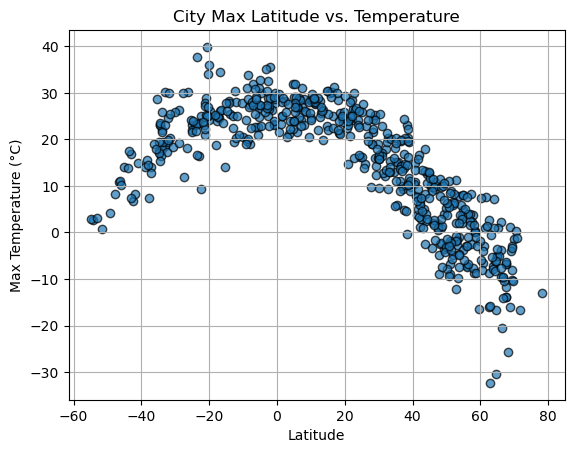

In [18]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.7)

# Incorporate graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

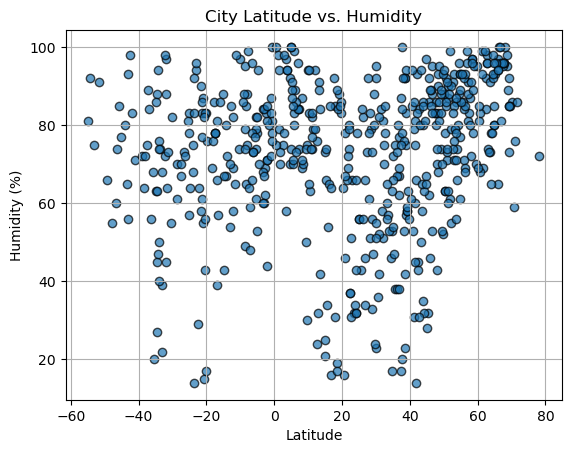

In [17]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

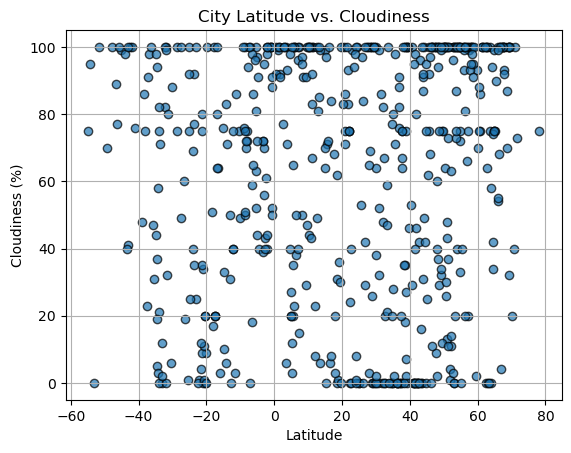

In [16]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.7)

# Incorporate graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

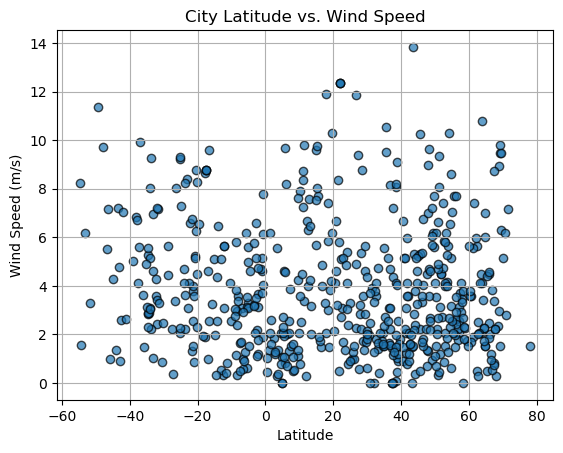

In [19]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas DataFrame named city_data_df
# Replace 'Lat' and 'Wind Speed' with the actual column names from your DataFrame

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.7)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


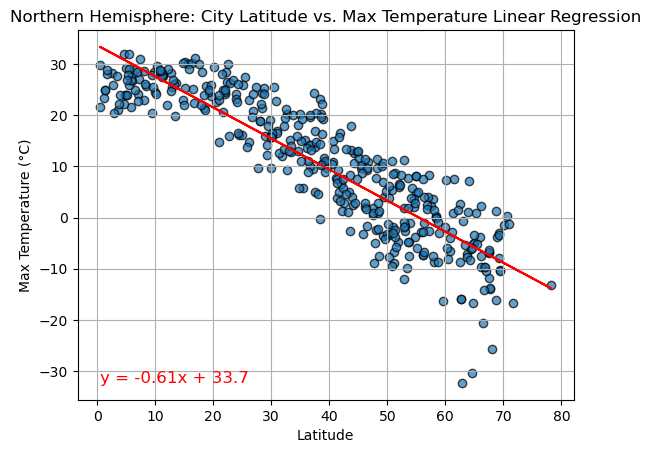

NameError: name 'northern_hemi_df' is not defined

In [24]:
# Filter data for the Northern Hemisphere (Latitudes greater than or equal to 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the plot_linear_regression function
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'],
                       'Northern Hemisphere: City Latitude vs. Max Temperature Linear Regression',
                       'Latitude', 'Max Temperature (°C)', 'Northern_Hemisphere_Temp_vs_Lat_LinearRegression.png')




# Display sample data
northern_hemi_df.head()

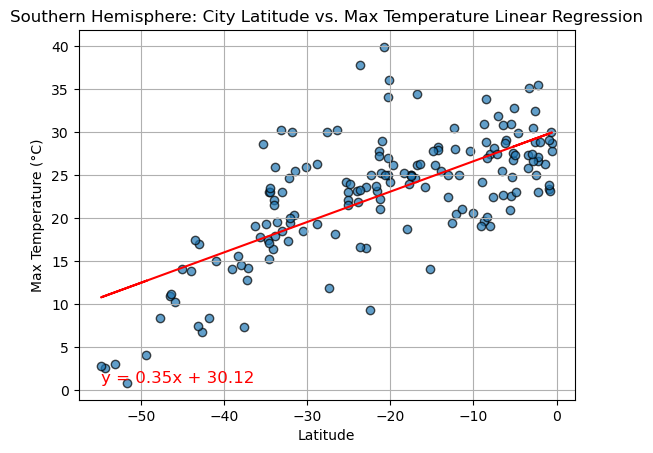

NameError: name 'southern_hemi_df' is not defined

In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter data for the Southern Hemisphere (Latitudes less than 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the plot_linear_regression function
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'],
                       'Southern Hemisphere: City Latitude vs. Max Temperature Linear Regression',
                       'Latitude', 'Max Temperature (°C)', 'Southern_Hemisphere_Temp_vs_Lat_LinearRegression.png')


# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

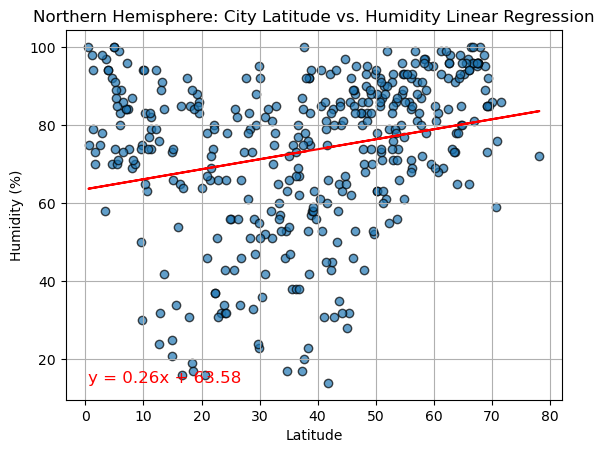

In [26]:

# Filter data for the Northern Hemisphere (Latitudes greater than or equal to 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the plot_linear_regression function
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'],
                       'Northern Hemisphere: City Latitude vs. Humidity Linear Regression',
                       'Latitude', 'Humidity (%)', 'Northern_Hemisphere_Humidity_vs_Lat_LinearRegression.png')


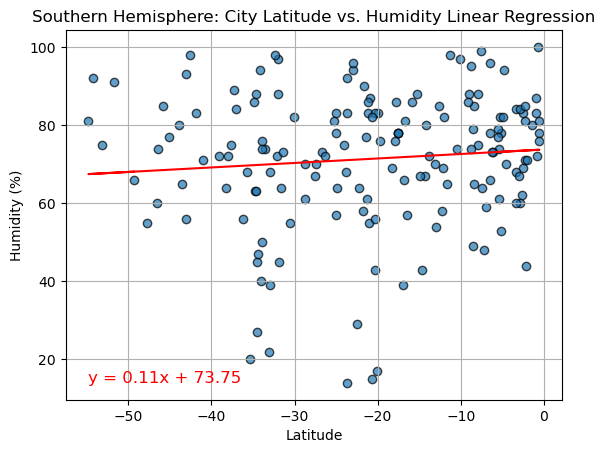

In [27]:
# Filter data for the Southern Hemisphere (Latitudes less than 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the plot_linear_regression function
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'],
                       'Southern Hemisphere: City Latitude vs. Humidity Linear Regression',
                       'Latitude', 'Humidity (%)', 'Southern_Hemisphere_Humidity_vs_Lat_LinearRegression.png')


**Discussion about the linear relationship:** Northern Hemisphere has much more data than Southern Hemisphere. Southern Hemisphere appears to have more areas (as a percentage) of high humidity.

### Humidity vs. Latitude Linear Regression Plot

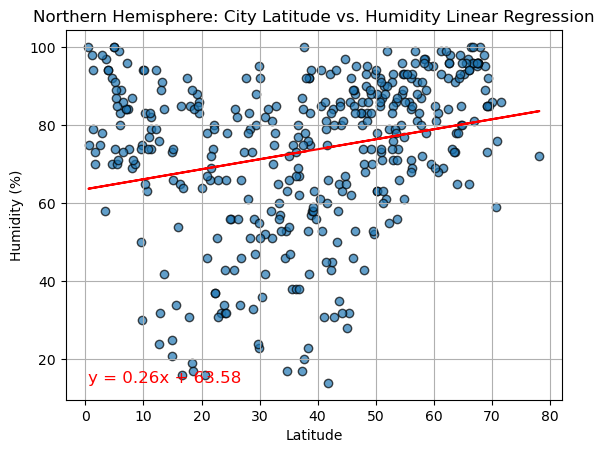

In [28]:
# Filter data for the Northern Hemisphere (Latitudes greater than or equal to 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the plot_linear_regression function
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'],
                       'Northern Hemisphere: City Latitude vs. Humidity Linear Regression',
                       'Latitude', 'Humidity (%)', 'Northern_Hemisphere_Humidity_vs_Lat_LinearRegression.png')


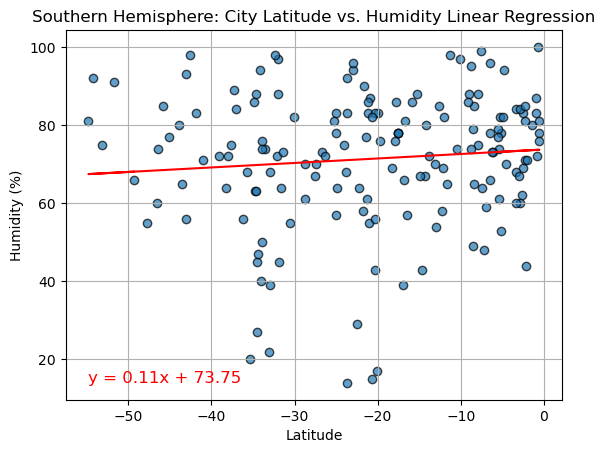

In [29]:
# Filter data for the Southern Hemisphere (Latitudes less than 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the plot_linear_regression function
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'],
                       'Southern Hemisphere: City Latitude vs. Humidity Linear Regression',
                       'Latitude', 'Humidity (%)', 'Southern_Hemisphere_Humidity_vs_Lat_LinearRegression.png')


**Discussion about the linear relationship:** Northern Hemisphere has much more data than Southern Hemisphere. Southern Hemisphere appears to have more areas (as a percentage) of high humidity.

### Cloudiness vs. Latitude Linear Regression Plot

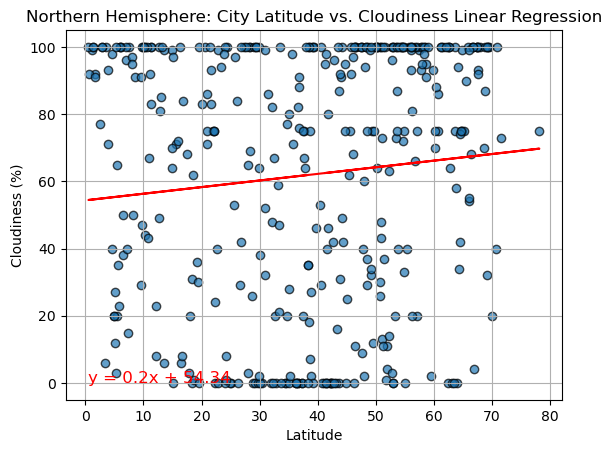

In [30]:
# Filter data for the Northern Hemisphere (Latitudes greater than or equal to 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the plot_linear_regression function
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'],
                       'Northern Hemisphere: City Latitude vs. Cloudiness Linear Regression',
                       'Latitude', 'Cloudiness (%)', 'Northern_Hemisphere_Cloudiness_vs_Lat_LinearRegression.png')


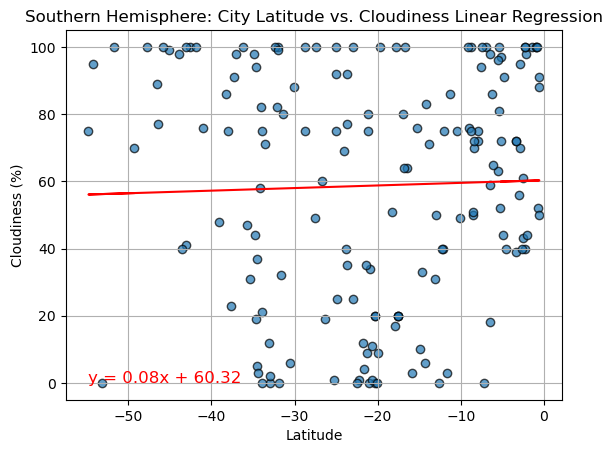

In [31]:
# Filter data for the Southern Hemisphere (Latitudes less than 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the plot_linear_regression function
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'],
                       'Southern Hemisphere: City Latitude vs. Cloudiness Linear Regression',
                       'Latitude', 'Cloudiness (%)', 'Southern_Hemisphere_Cloudiness_vs_Lat_LinearRegression.png')


**Discussion about the linear relationship:** There is a lot of variance in both the Northern and Southern Hemisphers.

### Wind Speed vs. Latitude Linear Regression Plot

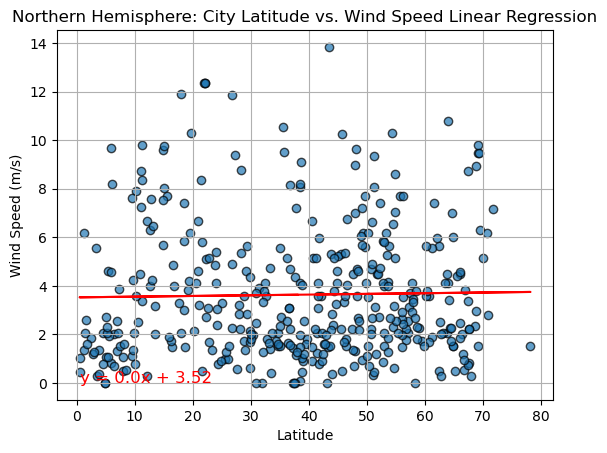

In [32]:
# Filter data for the Northern Hemisphere (Latitudes greater than or equal to 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the plot_linear_regression function
plot_linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'],
                       'Northern Hemisphere: City Latitude vs. Wind Speed Linear Regression',
                       'Latitude', 'Wind Speed (m/s)', 'Northern_Hemisphere_WindSpeed_vs_Lat_LinearRegression.png')


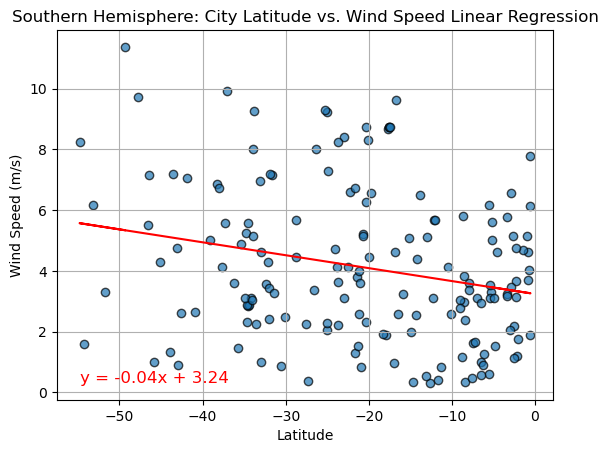

In [34]:
# Filter data for the Southern Hemisphere (Latitudes less than 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the plot_linear_regression function
plot_linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'],
                       'Southern Hemisphere: City Latitude vs. Wind Speed Linear Regression',
                       'Latitude', 'Wind Speed (m/s)', 'Southern_Hemisphere_WindSpeed_vs_Lat_LinearRegression.png')


**Discussion about the linear relationship:** there's a concentration of low wind speed in the Northern Hemisphere.